# ASSIGNMENT 5
Submitted by: Arundhuti Chakraborty

# Importing Neccesary Packages

In [1]:
import cv2
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import pandas as pd
from keras.applications import VGG16

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Importing Data And Preprocessing

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Gender_Classification/test_fkwGUNG (1).csv")

In [ ]:
train.info()

In [ ]:
train['class'].value_counts()

In [ ]:
image_dir="/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images"

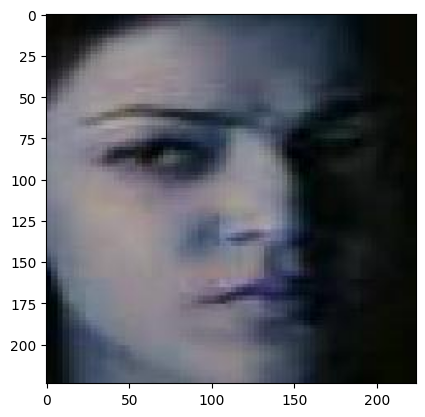

In [7]:
im = cv2.imread("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images/1234.jpg")
im2 = cv2.imread("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images/66.jpg")

plt.imshow(im)

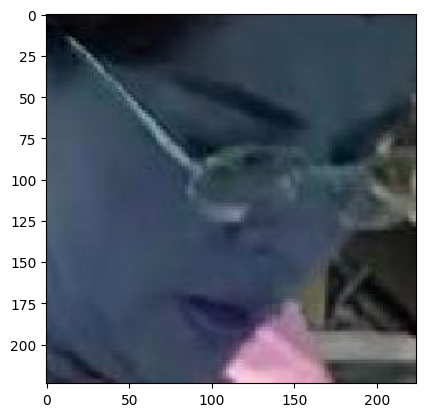

In [8]:
plt.imshow(im2)

In [9]:
# Convert the "class" column to string type
train['class'] = train['class'].astype(str)

In [10]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True,     # Randomly flip images horizontally
    vertical_flip=True,       # Randomly flip images vertically
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    zoom_range=[0.8, 1.2],   # Randomly zoom in or out
    shear_range=0.2,          # Randomly apply shear transformations
    fill_mode='nearest'       # Fill in missing pixels using the nearest neighbor strategy
)
batch_size=32

In [11]:
traingen = datagen.flow_from_dataframe(
    dataframe=train[:9756],
    directory=image_dir,
    x_col='image_names',
    y_col='class',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(32, 32)
)

Found 9756 validated image filenames belonging to 2 classes.


In [12]:
valgen = datagen.flow_from_dataframe(
    dataframe=train[9756:],
    directory=image_dir,
    x_col='image_names',
    y_col='class',
    class_mode='binary',
    batch_size=50,
    target_size=(32, 32)
)

Found 2440 validated image filenames belonging to 2 classes.


In [13]:
trainsample = next(traingen)
print("Dimensions of training sample", trainsample[0].shape)

Dimensions of training sample (32, 32, 32, 3)


In [14]:
valsample = next(valgen)
print("Dimensions of validation sample",valsample[0].shape)

Dimensions of validation sample (50, 32, 32, 3)


In [15]:
num_train_samples = traingen.samples
num_val_samples = valgen.samples

print("Number of training samples", num_train_samples)
print("Number of validation samples", num_val_samples)

Number of training samples 9756
Number of validation samples 2440


In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [17]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


In [18]:
model = Model(inputs=base_model.input, outputs=predictions)


In [19]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(
    traingen,
    steps_per_epoch=len(traingen),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=valgen,  # If you have a validation generator
    validation_steps=len(valgen),  # If you have a validation generator
)


Epoch 1/10
305/305 [==============================] - 3329s 11s/step - loss: 0.7117 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 2/10
305/305 [==============================] - 899s 3s/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 3/10
305/305 [==============================] - 891s 3s/step - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 4/10
305/305 [==============================] - 903s 3s/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 5/10
305/305 [==============================] - 905s 3s/step - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 6/10
305/305 [==============================] - 906s 3s/step - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 7/10
305/305 [==============================] - 928s 3s/step - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6931 - val_accuracy: 0.50